In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In C:\Users\olale\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\olale\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\olale\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\olale\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\olale\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv('Covid19 tracking Data.csv')
df

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,10/29/2020,AK,A,77.0,77.0,6,NaN,NaN,NaN,89.0,...,584268.0,3669,NaN,NaN,NaN,NaN,NaN,0,584268.0,3669
1,10/29/2020,AL,A,2914.0,2718.0,3,196.0,20246.0,20246.0,1013.0,...,1327435.0,7129,NaN,NaN,64185.0,NaN,NaN,0,1327435.0,7129
2,10/29/2020,AR,A+,1894.0,1732.0,19,162.0,6967.0,6967.0,647.0,...,1325290.0,12348,NaN,21856.0,NaN,56296.0,NaN,0,1325290.0,12348
3,10/29/2020,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1616.0,0,NaN,NaN,NaN,NaN,NaN,0,1616.0,0
4,10/29/2020,AZ,A+,5918.0,5626.0,13,292.0,21260.0,21260.0,874.0,...,1745662.0,14215,318101.0,NaN,NaN,NaN,1745662.0,14215,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13471,1/24/2020,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
13472,1/23/2020,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,2.0,1,NaN,NaN,NaN,NaN,NaN,0,2.0,1
13473,1/23/2020,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
13474,1/22/2020,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,0,1.0,1


***Let's format the variable called "Date" so as to make  better sense of our data ***

In [3]:

df['date'] =  pd.to_datetime(df['date'], format="%m/%d/%Y")

In [4]:
df.tail()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
13471,2020-01-24,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
13472,2020-01-23,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,2.0,1,NaN,NaN,NaN,NaN,NaN,0,2.0,1
13473,2020-01-23,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
13474,2020-01-22,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,0,1.0,1
13475,2020-01-22,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


***Let us do some data profiling to ascertain the data types and verify its quality***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13476 entries, 0 to 13475
Data columns (total 42 columns):
date                                13476 non-null datetime64[ns]
state                               13476 non-null object
dataQualityGrade                    12244 non-null object
death                               12677 non-null float64
deathConfirmed                      5600 non-null float64
deathIncrease                       13476 non-null int64
deathProbable                       4082 non-null float64
hospitalized                        7775 non-null float64
hospitalizedCumulative              7775 non-null float64
hospitalizedCurrently               10500 non-null float64
hospitalizedIncrease                13476 non-null int64
inIcuCumulative                     2265 non-null float64
inIcuCurrently                      6116 non-null float64
negative                            13189 non-null float64
negativeIncrease                    13476 non-null int64
negativeTests

***Here's a peep into what our data looks like***

In [6]:
#Peeping into the data
df.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-10-29,AK,A,77.0,77.0,6,NaN,NaN,NaN,89.0,...,584268.0,3669,NaN,NaN,NaN,NaN,NaN,0,584268.0,3669
1,2020-10-29,AL,A,2914.0,2718.0,3,196.0,20246.0,20246.0,1013.0,...,1327435.0,7129,NaN,NaN,64185.0,NaN,NaN,0,1327435.0,7129
2,2020-10-29,AR,A+,1894.0,1732.0,19,162.0,6967.0,6967.0,647.0,...,1325290.0,12348,NaN,21856.0,NaN,56296.0,NaN,0,1325290.0,12348
3,2020-10-29,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1616.0,0,NaN,NaN,NaN,NaN,NaN,0,1616.0,0
4,2020-10-29,AZ,A+,5918.0,5626.0,13,292.0,21260.0,21260.0,874.0,...,1745662.0,14215,318101.0,NaN,NaN,NaN,1745662.0,14215,NaN,0


***Let's replcace all Nan values with -1***

In [8]:
#Replacing Nan by -1
df.fillna(value=-1, inplace=True)

In [9]:
df.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-10-29,AK,A,77.0,77.0,6,-1.0,-1.0,-1.0,89.0,...,584268.0,3669,-1.0,-1.0,-1.0,-1.0,-1.0,0,584268.0,3669
1,2020-10-29,AL,A,2914.0,2718.0,3,196.0,20246.0,20246.0,1013.0,...,1327435.0,7129,-1.0,-1.0,64185.0,-1.0,-1.0,0,1327435.0,7129
2,2020-10-29,AR,A+,1894.0,1732.0,19,162.0,6967.0,6967.0,647.0,...,1325290.0,12348,-1.0,21856.0,-1.0,56296.0,-1.0,0,1325290.0,12348
3,2020-10-29,AS,D,0.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,...,1616.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1616.0,0
4,2020-10-29,AZ,A+,5918.0,5626.0,13,292.0,21260.0,21260.0,874.0,...,1745662.0,14215,318101.0,-1.0,-1.0,-1.0,1745662.0,14215,-1.0,0


***Here's the function to plot a chart of each  given variable and states in our historical dataset***

In [12]:
#Function to plot a chart of given Variable/State
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

***Below are test plots for to be reviewed***

C:\Users\olale\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


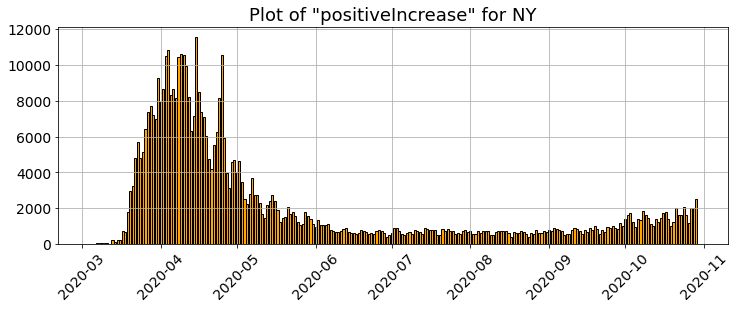

In [13]:
#Some test plot
plot_var()

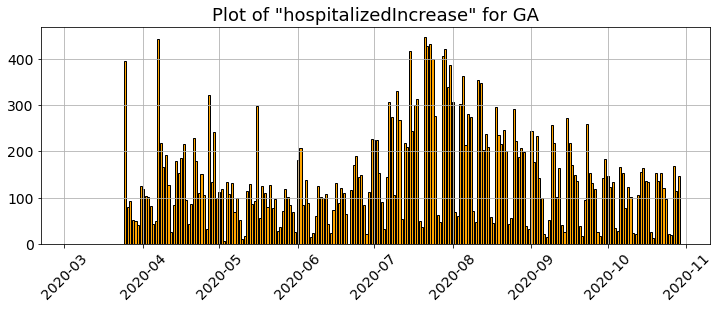

In [14]:
plot_var('hospitalizedIncrease','GA')

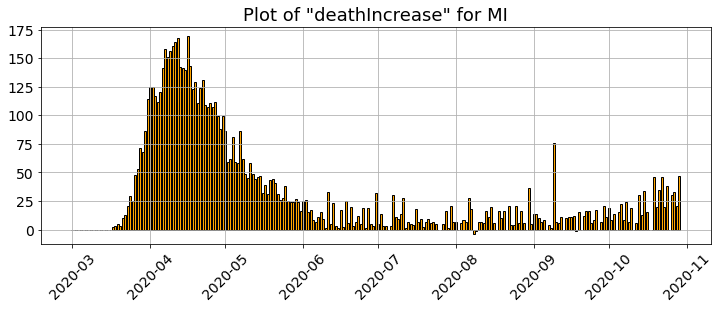

In [15]:
plot_var('deathIncrease','MI')

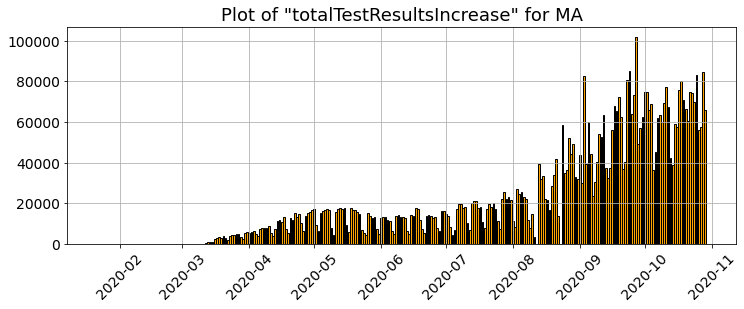

In [16]:
plot_var('totalTestResultsIncrease','MA')

In [ ]:
#Function to create scatter plot of two variables of a given state

***Here's our function to create a scatter plot of two variables of a given state***

In [18]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

In [ ]:
#Test some plots.

***Once again we implement or carry out some test plots***

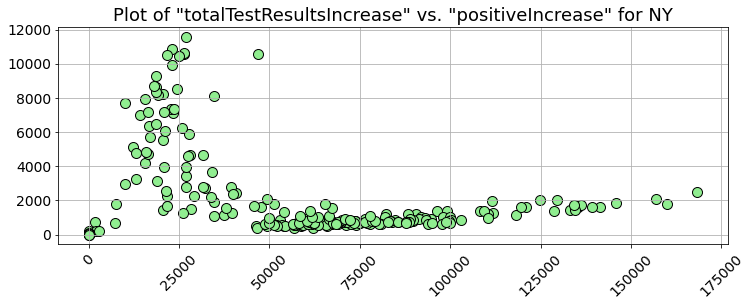

In [19]:
plot_xy(state='NY')

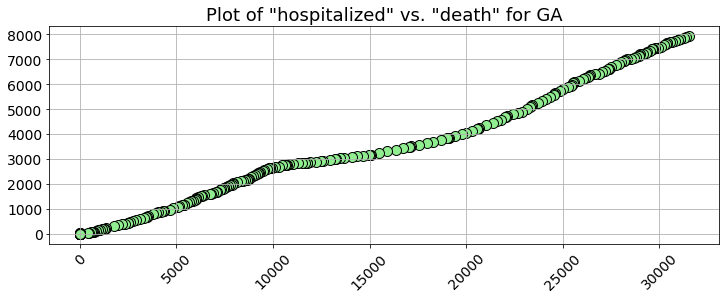

In [20]:
plot_xy('hospitalized','death','GA')

In [21]:
plot_xy('hospitalized','death','CA')

Some of the data unavailable for a scatter plot. Sorry!


In [ ]:
#Testing tracker function
#Testing is crucially important to track the spread of the virus and contain it. 
#Let us see how states are doing on this aspect relatively.

***We are about to test the tracker function***
****A proper assessment  or test is required to track the 
spread of this notorious virus so as to curb its spread***

In [25]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()        

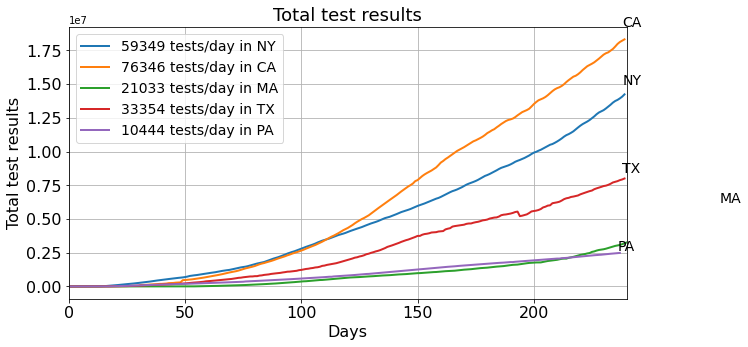

In [26]:
plotTesting()

In [ ]:
#California is doing better than other states based on daily tests of Corona Virus
#There must be a reason for this, could be that they have better logistics and administration
#NewYork follows, followed by Texas and PA


***California appears to be doing better 
based on the daily test of Corona Virus***


***There must be a plausible reason for this, 
could it be that they have better logistics
and administration ?***

In [29]:
#Function to compute fatality ratio (with the latest data)
def fatality_ratio(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

***Below is the code snippet to compute the hospitalization ratio***

In [31]:
#Function to compute hospitalization ratio (with the latest data)
def hospitalization_ratio(state='NY'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

***Below is code snippet for computing the positive cases as well as total test ratio***

In [33]:
#Function to compute positive case/total test ratio (with the latest data)
def positiveTest_ratio(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

***In a similar vein, below is the code snippet to calculate     the recovery ratio***

In [35]:
#Function to calculate recovery ratio (with the latest data)
def recovery_ratio(state='NY'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

***Note that we are about to compute the fatality ratio chart***

***We will plot this chart by observing 6 states for proper review and representation***

In [ ]:
#Fatality ratio chart
#We will plot the chart with six states,

#California
#New York
#Michigan
#Massachusetts
#Pennsylvania
#Illinois

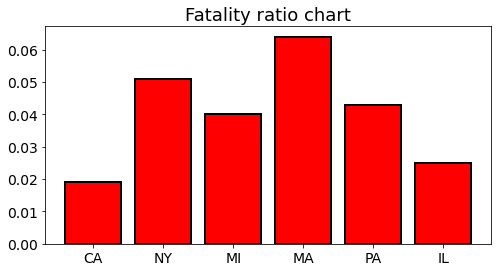

In [36]:
states = ['CA','NY','MI','MA','PA','IL']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

***After a proper assessment of the chart, we are able to uncover the following trends:***

***Massachusetts has the highest recorded cases  of death in the above plot***

***This backdrop is recorded as a result of the failure of state government to 
mandate the wearing of mask as recommended by the Centre for Disease Control***

***NewYork follows on the chart, next on  the record is Pennsylvania
and then Michigan, and then we have the state of Michigan coming next, and California 
is known to have recorded the lowest cases***
***of  death as it comes last on the list of fatality ratio plot***

In [ ]:
#MA has the highest recorded cases of death in the above plot.
#This must be due to the failure of the state government to mandate wearing mask,
#as encouraged by Donald Trump
#NewYork follows on the chart, next is Pennysylvania
#and then Michigan
#Illinois comes next,
#Last on the list of our fatality ratio plot is California

In [ ]:
#Hospitalization chart
#The next hospitalization rate chart is tried for the some set of states but only two of them reports proper data. 
#Therefore, the code plots the chart only for those states.

***Hospitalization chart is implemented for the states below, 
with a case of only two states having the proper data***

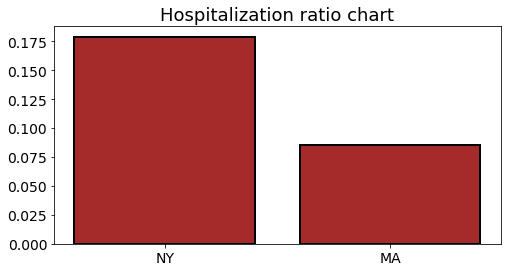

In [37]:
states = ['CA','NY','MI','MA','PA','IL']
hos,x = [],[]
for s in states:
    data = hospitalization_ratio(s)
    if data!=-1:
        hos.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='brown',
        edgecolor='k',linewidth=2)
plt.show()

***NewYork seems to be doing worse than Masscheussets in hospitalization rate.
 This could suggest that  more people are being infected 
    with Corona Virus in Newyork than Michigan
State. population is another factor to consider. The fact that
New York is a more industrialized state 
may have been a factor that 
played a role in it being more densely 
populated than Michigan
This may have accounted for the great difference in hospitalization rate between Newyork
and MA***

In [ ]:
***Test-positive ratio chart:
The percent postive is percent of all corona virus test that is actually positive.
It will be high if the number of positive test is too high or
if the number of total test is too low
A higher percent positive suggests higher transmission and that there
are likely more people with Corona Virus who have not been tested
One threshold for percent positive being too high is 5%***

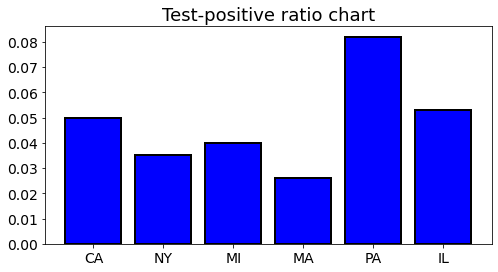

In [38]:
states = ['CA','NY','MI','MA','PA','IL']
tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

***From the above plot we can  see that states like Pennysylvania and California as well as
Illinois  are known to have 
recorded  a high positve ratio as they meet the 5% threshold*** 

***Bubble charts...***

C:\Users\olale\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


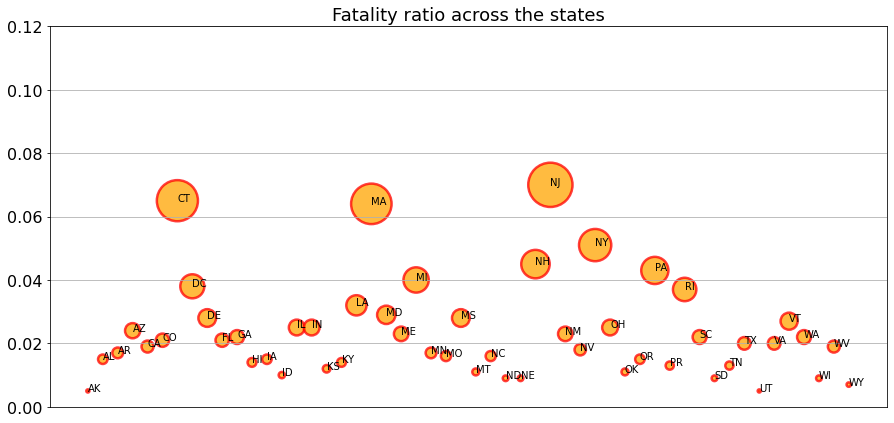

In [39]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

***New Jersey has the highest fatality ratio so far, followed by  Connecticut and Michigan,
NewYork comes next among the four worst hit by death cases***

C:\Users\olale\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


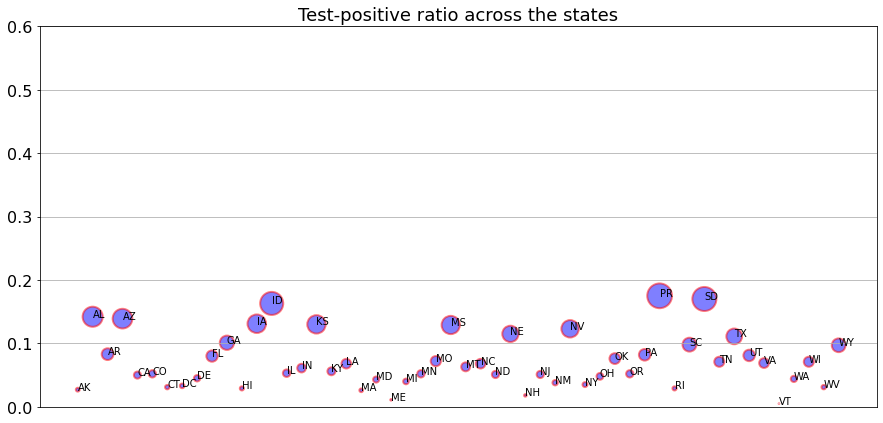

In [40]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.6)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

***The crucial question: 
    Which states have 
    on record a 14 days
    of decreasing case counts? ***


In [42]:
def caseCountsdecrease(days=14,state='NY'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

*** Let's generate plots for a few states
We will note that no state, so far, 
has shown a consistent decrease of new cases 
for the last 14 days!***

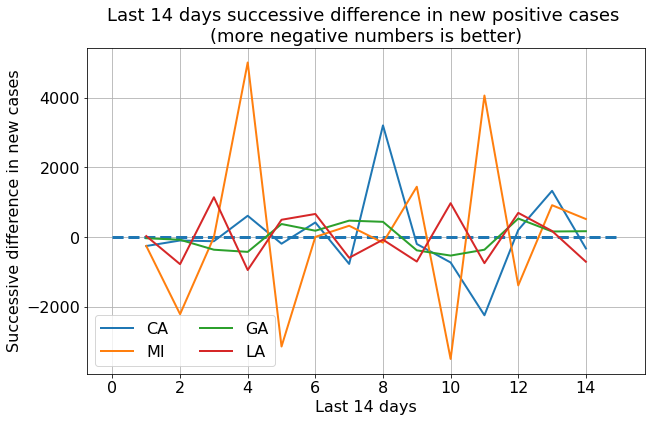

In [43]:
states = ['CA','MI','GA','LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

***The state of Georgia appears to meet the criteria of consistent decrease in the last 14 days.
Others have not done well in this regardThe trend for other states appear to be epileptic***

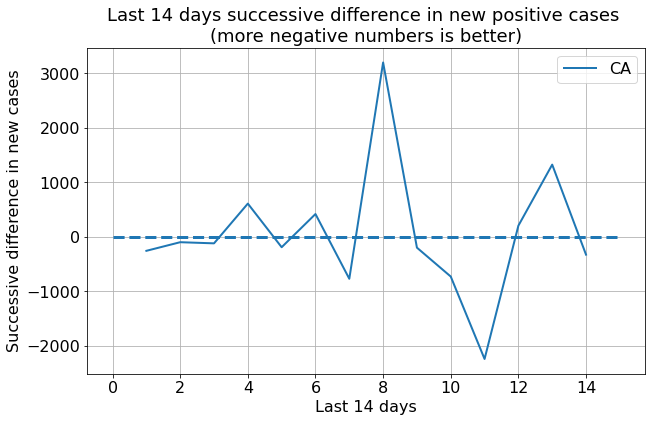

In [44]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

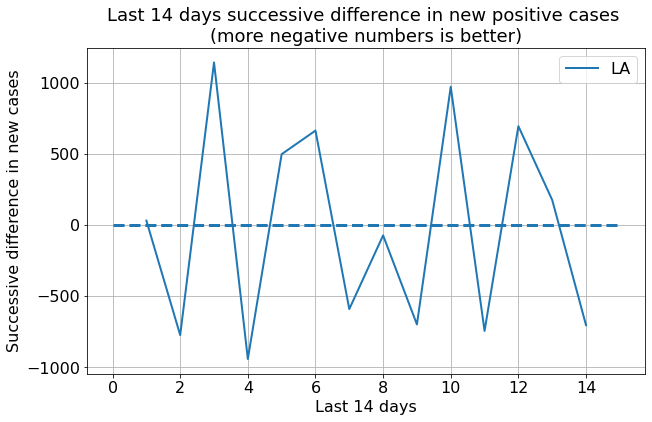

In [45]:
states = ['LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()